# The Problem with JPEG Images

The JPEG image format uses a lossy compression in order to reduce file size. This uses a discrete cosine transform and scrambles the high spatial frequency (high resolution) information in the image. This notebook illustrates the loss of information when stored as a JPEG. I first tried this in `ImageJ` but decided it would be easier to do well using `Python` and the `scipy / numpy / scikit-image` stack with this `Jupyter` notebook.

First, import the packages we need...

In [1]:
%matplotlib inline
import os
from PIL import Image as pil
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread, imsave
from jmToolsPy3 import showImages, plotImageWithHistogram, plotImage

## Load the exemplar image

Load an exemplar image, convert it to JPEG, store it, and open the JPEG image. Note that these are 8 bit per pixel grayscale images.

Note [StackOverflow](http://stackoverflow.com/questions/384759/pil-and-numpy) recommends

```
# Open I as an array:
> I = numpy.asarray(PIL.Image.open('test.jpg'))
# Do some stuff to I, then, convert it back to an image:
> im = PIL.Image.fromarray(numpy.uint8(I))
```

# Calculate the difference

We want to convert these to floating point image, subtract them, and look at the difference.

In [2]:
gitDir = os.getenv('GIT_HOME')
relImg = '/OSImageAnalysis/images/mandrill-gray.tif'
imgPth = gitDir + relImg
jpgPth = './mandrill-gray.jpg'

ori = imread(imgPth)
print(ori.shape, ori.dtype)

pim = pil.fromarray(np.uint8(ori))
pim.save(jpgPth, "JPEG", quality=15)

jpg = imread(jpgPth)
print(jpg.shape, jpg.dtype)

(512, 512) uint8
(512, 512) uint8


/Users/jrminter/anaconda/lib/python3.5/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


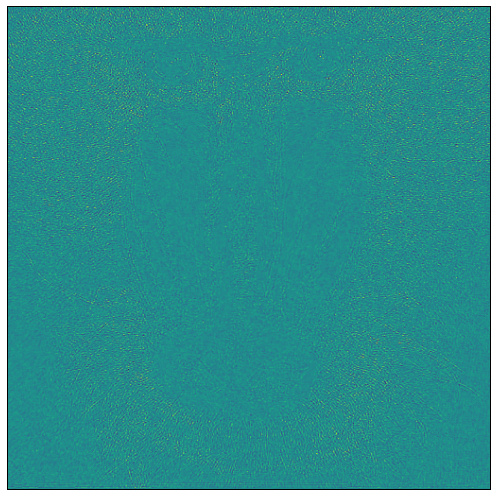

In [3]:
ori = ori.astype(float)
jpg = jpg.astype(float)
dif = ori - jpg

minV = np.min(dif)
maxV = np.max(dif)

dif -= minV
dif *= (255.0/maxV)

plotImage(dif, cmap='viridis', figsize=(7,7), bare=True);

# plt.imshow(dif, cmap='viridis');
# plt.show();